# **Assignment 7 - Text Classification**
David Nguyen
<br><br/>
Dataset: https://www.kaggle.com/datasets/deepcontractor/200k-short-texts-for-humor-detection
<br><br/>
## Describe the data set and what the model should be able to predict.
This dataset classify if a piece of text is funny / a joke or not.

The model should be able to predict if a given piece of text is a joke or not.


In [171]:
# Import libraries
import nltk
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# read in dataset
df = pd.read_csv('./dataset.csv', header=0, usecols=[0,1], encoding='latin-1')
df["humor"] = df["humor"].astype(int) # turns humor column's T/F to int 1/0
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (230814, 2)
                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...      0
1  Watch: darvish gave hitter whiplash with slow ...      0
2  What do you call a turtle without its shell? d...      1
3      5 reasons the 2016 election feels so personal      0
4  Pasco police shot mexican migrant from behind,...      0


In [172]:
# Text preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# removing stop words and creating a tf-idf representation of the data
stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

In [173]:
# set up X and y
X = df.text
y = df.humor

#  Create a graph showing the distribution of the target classes

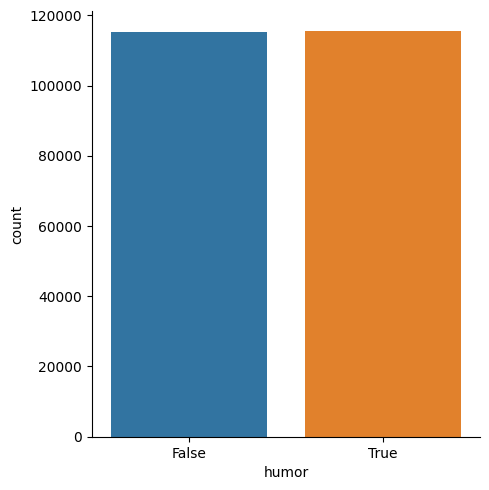

In [110]:
# Create a graph showing the distribution of the target classes
import seaborn as sb
df_y = pd.DataFrame(y,columns=['label'])
sb.catplot(x='humor', kind='count', data=df)

# Naive Bayes


In [174]:
# Split the data into train and test sets, with 20% of the data going to the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(184651,)

In [176]:
# take a peek at the data
print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

train size: (184651, 57343)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (46163, 57343)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [175]:
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [111]:
from sklearn.naive_bayes import MultinomialNB
# Multinomial classifier.
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [112]:
# priors
import math
prior_p = sum(y_train == 1)/len(y_train)
print('prior text:', prior_p, 'log of prior:', math.log(prior_p))

# the model prior matches the prior calculated above
naive_bayes.class_log_prior_[1]

prior text: 0.500230163930875 log of prior: -0.6926869586165618


-0.6926869586165623

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

[[20792  2315]
 [ 2142 20914]]


In [178]:
# the log likelihood of words given the class
naive_bayes.feature_log_prob_

array([[-12.61334074,  -7.64549886, -12.61334074, ..., -12.40680169,
        -12.40680169, -12.22438074],
       [-10.22227996,  -8.87690411, -12.04618894, ..., -12.55530915,
        -12.55530915, -12.55530915]])

In [114]:
print('accuracy score: ', accuracy_score(y_test, pred))
      
print('\nprecision score (not joke): ', precision_score(y_test, pred, pos_label=0))
print('precision score (joke): ', precision_score(y_test, pred))

print('\nrecall score: (not joke)', recall_score(y_test, pred, pos_label=0))
print('recall score: (joke)', recall_score(y_test, pred))
      
print('\nf1 score: ', f1_score(y_test, pred))

accuracy score:  0.9034508155882417

precision score (not joke):  0.9066015522804569
precision score (joke):  0.9003400921262216

recall score: (not joke) 0.8998139092050028
recall score: (joke) 0.9070957668285913

f1 score:  0.903705304094199


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.91      0.90      0.90     23107
        True       0.90      0.91      0.90     23056

    accuracy                           0.90     46163
   macro avg       0.90      0.90      0.90     46163
weighted avg       0.90      0.90      0.90     46163



# Logistic Regression


In [164]:
# vectorizer
vectorizer = TfidfVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# train with same dataset
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=200)
classifier.fit(X_train, y_train)

# evaluate
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))
probs = classifier.predict_proba(X_test)
print('log loss: ', log_loss(y_test, probs))

accuracy score:  0.9286441522431385
precision score:  0.9317109402306886
recall score:  0.9249219292158224
f1 score:  0.9283040222880027
log loss:  0.1948009670700701


# Neural Network

In [138]:
# text preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords), binary=True)

In [139]:
# set up X and y
X = vectorizer.fit_transform(df.text)
y = df.humor

In [140]:
# train and test with same dataset
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 2), random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')

In [141]:
# divide into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred))
print('recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

accuracy score:  0.4994476095574378
precision score:  0.4994476095574378
recall score:  1.0
f1 score:  0.6661754720524711


# Analysis of the Performance of Various Approaches

When using Naïve Bayes (Multinomial classifier), Logistic Regression, Neural Networks using sklearn to predict the class (if text is a joke) of the test data, the accuracy (correctly classifying a text) of each were 0.90, 0.92, and 0.50 respectively. So Logistic Regression was the best to use on this data. Neural Network gave a stragely low accuracy score but  I am not sure why.

The precision (What proportion of positive identifications was actually correct?) of each are 0.90, 0.93, and 0.50. So the same pattern coninues like the accuracy.

And the recall score (What proportion of actual positives was identified correctly) are 0.9, 0.92, and 1. So this time NN was the best, followed by Logistic Regression, and Naive Bayer.

And the F1 score (measures a model's performance) of each are 0.9, 0.93, and 0.67. Which explains why Logistic Regression was the best, followed by Naive Bayer, and Neural Networks.